## Gather

In [196]:
# Import the required libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import os
import json
import datetime
from timeit import default_timer as timer
import matplotlib.pyplot as plt
% matplotlib inline

In [197]:
# Read the "twitter-archive-enhanced.csv" file 
df_archive_enhanced = pd.read_csv("twitter-archive-enhanced.csv")

In [198]:
df_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [114]:
# Download the image_predictions file programmatically
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = "image-predictions.tsv"
response = requests.get(url)
if not os.path.isfile(file_name):
    with open (file_name, mode = "wb") as file :
        file.write(response.content)

In [199]:
df_image_predictions = pd.read_csv("image-predictions.tsv", sep = "\t")

In [200]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
# Get additional information from Twitter using API
# Creat an API object
consumer_key = "*****************************"
consumer_secret = "*****************************"
access_token = "*****************************"
access_secret = "*****************************"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
# Experiment to get one tweet"s information
exp_tweet = api.get_status(df_archive_enhanced.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
print(content)

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016', 'id': 747963614829678593, 'id_str': '747963614829678593', 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 747963600220917761, 'id_str': '747963600220917761', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'url': 'https://t.co/ZPfeRtOX0Q', 'display_url': 'pic.twitter.com/ZPfeRtOX0Q', 'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 937, 'h': 632, 'resize': 'fit'}, 'small': {'w': 680, 'h': 459, 'resize': 'fit'}, 'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 74796

In [25]:
# Get the required information for the tweets using API
tweet_ids = df_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [201]:
# Read the "tweet_json.text" file
df_tweets_all = pd.read_json("tweet_json.txt", lines=True)

In [202]:
df_tweets_all.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",35327,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7456,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30574,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5535,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23006,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3661,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",38616,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7626,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",36890,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8226,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [203]:
df_tweets_all.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [204]:
# Make a separate datafram for the tweet id, the favorite count and the retweet count
df_tweets = df_tweets_all[["id", "favorite_count", "retweet_count"]]

In [205]:
df_tweets.to_csv('tweets-API.csv', index=False) 

In [206]:
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,35327,7456
1,892177421306343426,30574,5535
2,891815181378084864,23006,3661
3,891689557279858688,38616,7626
4,891327558926688256,36890,8226


#### The output dataframs
- `df_archive_enhanced` reads twitter-archive-enhanced.csv
- `df_image_predictions` reads image-predictions.tsv
- `df_tweets reads` (id, favorite_count, retweet_count)

## Assess

#### Assess the twitter-archive-enhanced.csv

In [207]:
df_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [208]:
df_archive_enhanced.loc[df_archive_enhanced.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [209]:
df_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [210]:
df_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [211]:
df_archive_enhanced.expanded_urls.isnull().sum()

59

In [212]:
df_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1630,684538444857667585,6.844811e+17,4.196984e+09,2016-01-06 00:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After watching this video, we've determined th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684538444...,12,10,None,None,None,None,None
1625,684830982659280897,NaN,NaN,2016-01-06 20:16:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This little fella really hates stairs. Prefers...,NaN,NaN,NaN,https://vine.co/v/eEZXZI1rqxX,13,10,None,None,None,pupper,None
1649,683742671509258241,NaN,NaN,2016-01-03 20:12:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sebastian. He's a womanizer. Romantic af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683742671...,11,10,Sebastian,None,None,None,None
2003,672475084225949696,NaN,NaN,2015-12-03 17:58:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's photogenic af. Loves to se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672475084...,8,10,Buddy,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None


In [213]:
df_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Buddy          7
Toby           7
an             7
Daisy          7
Stanley        6
Scout          6
Bella          6
Leo            6
Dave           6
Koda           6
Rusty          6
Jack           6
Milo           6
Jax            6
Oscar          6
George         5
            ... 
Ralph          1
Harry          1
Rudy           1
Genevieve      1
Joey           1
Buckley        1
Brat           1
Tilly          1
Frönq          1
Kota           1
Jeffri         1
Shnuggles      1
Miley          1
Ronduh         1
Brutus         1
Lassie         1
Barry          1
Emanuel        1
Socks          1
Lillie         1
Franq          1
Blue           1
Skye           1
Chef           1
Rorie          1
Superpup       1
Jameson        1
Horace        

In [214]:
df_archive_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [215]:
df = pd.Series(df_archive_enhanced.name)
df.str.islower().value_counts()

False    2247
True      109
Name: name, dtype: int64

In [216]:
df = df_archive_enhanced[df_archive_enhanced.name.str.islower().fillna(False)]
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [217]:
df.name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
not              2
mad              2
incredibly       1
all              1
unacceptable     1
his              1
light            1
this             1
officially       1
my               1
life             1
by               1
space            1
old              1
infuriating      1
such             1
Name: name, dtype: int64

In [218]:
df.name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [219]:
list_names = list(df.name.unique())
list_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [220]:
sum(df_archive_enhanced.duplicated())

0

In [221]:
df_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [222]:
df_archive_enhanced.text[43]

"Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ"

In [223]:
df_archive_enhanced.rating_numerator[43]

12

In [224]:
df_archive_enhanced.text[533]

'This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie https://t.co/qTRY2qX9y4'

In [225]:
df_archive_enhanced.rating_numerator[533]

14

In [226]:
df_rating = df_archive_enhanced[df_archive_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
df_rating

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [227]:
df_rating.text[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [228]:
df_rating.text[340]

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [229]:
df_rating.text[695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [230]:
df_rating.text[763]

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [231]:
df_rating.text[1712]

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [232]:
df_rating.text[1689]

"I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"

#### Assess the image-predictions.tsv file

In [233]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [234]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [235]:
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1645,808134635716833280,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
123,668226093875376128,https://pbs.twimg.com/media/CUYEFlQXAAUkPGm.jpg,1,trombone,0.390339,False,cornet,0.314149,False,French_horn,0.255182,False
111,667902449697558528,https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg,1,Norwegian_elkhound,0.298881,True,malamute,0.279479,True,Eskimo_dog,0.198428,True
1674,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,3,beagle,0.848735,True,Ibizan_hound,0.044603,True,Italian_greyhound,0.018611,True
719,685906723014619143,https://pbs.twimg.com/media/CYTUhn7WkAEXocW.jpg,1,Yorkshire_terrier,0.414963,True,briard,0.063505,True,Pekinese,0.053682,True


In [236]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [237]:
df_image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
Samoyed                            20
chow                               20
toy_terrier                        20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [238]:
df_image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [239]:
sum(df_image_predictions.duplicated())

0

In [240]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Assess the favorit_count and retweet_count 

In [241]:
df_tweets

,id,favorite_count,retweet_count
0,892420643555336193,35327,7456
1,892177421306343426,30574,5535
2,891815181378084864,23006,3661
3,891689557279858688,38616,7626
4,891327558926688256,36890,8226
5,891087950875897856,18613,2753
6,890971913173991426,10808,1781
7,890729181411237888,59513,16674
8,890609185150312448,25603,3806
9,890240255349198849,29202,6467


In [242]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [243]:
sum(df_tweets.duplicated())

0

In [244]:
df_tweets.sample(5)

,id,favorite_count,retweet_count
1071,736392552031657984,17172,7097
239,845306882940190720,22625,5155
1886,674410619106390016,1137,433
92,874057562936811520,20956,3546
1893,674271431610523648,1469,683


In [245]:
df_tweets.describe()

,id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7381.554698,2619.105534
std,6.823170e+16,11464.527881,4431.549071
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1282.500000,530.500000
50%,7.182469e+17,3201.000000,1222.000000
75%,7.986692e+17,9031.000000,3042.000000
max,8.924206e+17,152213.000000,75261.000000


#### Quality
##### `archive` table
- Timestamp column is string not datetime
- Missing values in 5 columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- lowercase names in the name column which are not actually names
- In the name column there is "O" and it should be "O'Malley"
- The column header "expanded_urls" is not descriptive
- The url and the rating exists with the text column
- In the timestamp there is "+0000"
- Missing values in the expanded_urls column
- The column header "name"
- Timestamp column should be 2 columns one for date and the other for timing
- Extra column should be done for the rating (numerator / denominator)
- Columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) should be removed
- The 3 tables should be merged on the "tweet_id"
- The source column 
- The rating in the text
- the data type in rating_numerator and rating_denominator is integer

##### `images` table
- The columns header are not descriptive (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)
- The names given in p1, p2, p3 is a mixture of lowercase and uppercase
- Some names is separated by "-" or " _" or space
- The img_num column

##### `favorit count & retweet count` table
- The header "id" should be "tweet_id"

#### Tidiness
##### `archive` table
- columns (doggo, floofer, pupper, puppo) should be one column
- Merge the 3 tables 

## Clean

#### Clean the twitter-archive-enhanced.csv file

In [246]:
# Make copies
df_archive_clean = df_archive_enhanced.copy()
df_image_clean = df_image_predictions.copy()
df_tweets_clean = df_tweets.copy()

#### Define
- Remove the missing values in the expanded_urls column

#### Code

In [247]:
df_archive_clean = df_archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [248]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

#### Define
- Drop the columns contain missing values (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Code

In [249]:
df_archive_clean = df_archive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis = 1)

#### Test

In [250]:
df_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Define
- Remove +0000 from the timestamp column

#### Code

In [251]:
df_archive_clean.timestamp = df_archive_clean.timestamp.str.strip('+0000')

#### Test

In [252]:
df_archive_clean.timestamp

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
5       2017-07-29 00:08:17 
6       2017-07-28 16:27:12 
7       2017-07-28 00:22:40 
8       2017-07-27 16:25:51 
9       2017-07-26 15:59:51 
10      2017-07-26 00:31:25 
11      2017-07-25 16:11:53 
12      2017-07-25 01:55:32 
13      2017-07-25 00:10:02 
14      2017-07-24 17:02:04 
15      2017-07-24 00:19:32 
16      2017-07-23 00:22:39 
17      2017-07-22 16:56:37 
18      2017-07-22 00:23:06 
19      2017-07-21 01:02:36 
20      2017-07-20 16:49:33 
21      2017-07-19 16:06:48 
22      2017-07-19 03:39:09 
23      2017-07-19 00:47:34 
24      2017-07-18 16:08:03 
25      2017-07-18 00:07:08 
26      2017-07-17 16:17:36 
27      2017-07-16 23:58:41 
28      2017-07-16 20:14:00 
29      2017-07-15 23:25:31 
                ...         
2326    2015-11-17 00:24:19 
2327    2015-11-17 00:06:54 
2328    2015-11-16 23:23:41 
2329    2015-1

#### Define
- Change the timestamp column from string to datetime

#### Code

In [253]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

#### Test

In [254]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 233.3+ KB


#### Define
- Seperate the timestamp column to 2 columns one for day and the other for the time

#### Code

In [255]:
df_archive_clean["date"] = df_archive_clean["timestamp"].dt.date
df_archive_clean["time"] = df_archive_clean["timestamp"].dt.time
df_archive_clean = df_archive_clean.drop(["timestamp"], axis = 1)

#### Test

In [256]:
df_archive_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


#### Define
- Reorder the columns

#### Code

In [257]:
df_archive_clean = df_archive_clean[['tweet_id','date','time', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

#### Test

In [258]:
df_archive_clean.head(1)

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Define
- Melt the columns (doggo, floofer, pupper, puppo) to one column called dog_stage

#### Code

In [259]:
df_archive_clean.shape

(2297, 13)

In [260]:
df_archive_clean.doggo = df_archive_clean.doggo.str.replace('None', '')
df_archive_clean.floofer = df_archive_clean.floofer.str.replace('None', '')
df_archive_clean.pupper = df_archive_clean.pupper.str.replace('None', '')
df_archive_clean.puppo = df_archive_clean.puppo.str.replace('None', '')

In [261]:
df_archive_clean["dog_stage"] = df_archive_clean["doggo"] + df_archive_clean["floofer"] + df_archive_clean["pupper"] + df_archive_clean["puppo"]

#### Test

In [262]:
df_archive_clean

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30,15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29,16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,
5,891087950875897856,2017-07-29,00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,,
6,890971913173991426,2017-07-28,16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,
7,890729181411237888,2017-07-28,00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,,,
8,890609185150312448,2017-07-27,16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,
9,890240255349198849,2017-07-26,15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,doggo


In [263]:
df_archive_clean = df_archive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1)

In [264]:
df_archive_clean.tail()

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2351,666049248165822465,2015-11-16,00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,
2352,666044226329800704,2015-11-16,00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,
2353,666033412701032449,2015-11-15,23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,
2354,666029285002620928,2015-11-15,23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,
2355,666020888022790149,2015-11-15,22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,


In [265]:
df_archive_clean.dog_stage.value_counts()

                1923
pupper           243
doggo             80
puppo             28
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [266]:
df_archive_clean.shape

(2297, 10)

#### Define
- Change the data type for the rating as floats

#### Code

In [267]:
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.astype(float)
df_archive_clean.rating_denominator = df_archive_clean.rating_denominator.astype(float)

#### Test

In [268]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2297 non-null int64
date                  2297 non-null object
time                  2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null float64
rating_denominator    2297 non-null float64
name                  2297 non-null object
dog_stage             2297 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 197.4+ KB


#### Define
- Extract the numerator rating from the text

#### Code

In [269]:
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [270]:
df_rating.text[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [271]:
df_rating.text[340]

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [272]:
df_rating.text[695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [273]:
df_rating.text[763]

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [274]:
df_rating.text[1712]

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [275]:
df_archive_clean.rating_numerator[45] = 13.5
df_archive_clean.rating_numerator[340] = 9.75
df_archive_clean.rating_numerator[695] = 9.75
df_archive_clean.rating_numerator[763] = 11.27
df_archive_clean.rating_numerator[1712] = 11.26

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

#### Test

In [276]:
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


#### Define
- Add a column that calculate the total rating  = numerator rating / denominator rating

#### Code

In [277]:
df_archive_clean["total_rating"] = df_archive_clean["rating_numerator"] / df_archive_clean["rating_denominator"]

#### Test

In [278]:
df_archive_clean.head()

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,total_rating
0,892420643555336193,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,1.3
1,892177421306343426,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,1.3
2,891815181378084864,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,1.2
3,891689557279858688,2017-07-30,15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,1.3
4,891327558926688256,2017-07-29,16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,1.2


In [279]:
# Reorder the columns
df_archive_clean = df_archive_clean[['tweet_id','date','time', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'total_rating', 'name', 'dog_stage']]
df_archive_clean.head(5)

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stage
0,892420643555336193,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,1.3,Phineas,
1,892177421306343426,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,1.3,Tilly,
2,891815181378084864,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,1.2,Archie,
3,891689557279858688,2017-07-30,15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,1.3,Darla,
4,891327558926688256,2017-07-29,16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,1.2,Franklin,


#### Define
- Change the lowercase names in the name column to "None"

#### Code

In [280]:
list_names = ['such','a','quite','not','one','incredibly','mad','an','very','just','my','his','actually','getting','this','unacceptable','all','old','infuriating','the','by','officially','life','light','space']
for name in list_names :
    df_archive_clean.loc[df_archive_clean.name == name]
    df_archive_clean["name"] = df_archive_clean["name"].replace(name , "None") 

#### Test

In [281]:
df_archive_clean.query(' name =="very" ')

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stage


In [282]:
df_archive_clean[df_archive_clean.name.str.islower().fillna(False)].name.value_counts()


Series([], Name: name, dtype: int64)

In [283]:
df_archive_clean

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stage
0,892420643555336193,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,1.3,Phineas,
1,892177421306343426,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,1.3,Tilly,
2,891815181378084864,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,1.2,Archie,
3,891689557279858688,2017-07-30,15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,1.3,Darla,
4,891327558926688256,2017-07-29,16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,1.2,Franklin,
5,891087950875897856,2017-07-29,00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,1.3,None,
6,890971913173991426,2017-07-28,16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,1.3,Jax,
7,890729181411237888,2017-07-28,00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,1.3,None,
8,890609185150312448,2017-07-27,16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,1.3,Zoey,
9,890240255349198849,2017-07-26,15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,1.4,Cassie,doggo


#### Define
- Remove website url and rating from text column

#### Code

In [284]:
import re
df_archive_clean['text'] = df_archive_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

#### Test

In [285]:
df_archive_clean.text[10]

'This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek '

#### Define
- Change the name of "O" to "O'Mally"

#### Code

In [286]:
df_archive_clean.loc[df_archive_clean.name == "O"]

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stage
775,776201521193218049,2016-09-14,23:30:38,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10.0,10.0,1.0,O,


In [287]:
df_archive_clean.loc[df_archive_clean.name == "O"]
df_archive_clean["name"] = df_archive_clean["name"].str.replace("O" , "O'Malley") 

#### Test

In [288]:
df_archive_clean.loc[df_archive_clean.name == "O"]

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stage


In [289]:
df_archive_clean.loc[df_archive_clean.name == "O'Malley"]

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stage
775,776201521193218049,2016-09-14,23:30:38,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10.0,10.0,1.0,O'Malley,


In [290]:
df_archive_clean.sample()

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stage
1438,696900204696625153,2016-02-09,03:35:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She's a Benebark Cumberpatch. S...,https://twitter.com/dog_rates/status/696900204...,12.0,10.0,1.2,Rosie,


#### Define
- Rename the "expanded_urls" column to "tweet_url"

#### Code

In [291]:
df_archive_clean = df_archive_clean.rename(columns = {"expanded_urls" : "tweet_url"})

#### Test

In [292]:
df_archive_clean.columns

Index(['tweet_id', 'date', 'time', 'source', 'text', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'total_rating', 'name',
       'dog_stage'],
      dtype='object')

In [293]:
df_archive_clean.head()

,tweet_id,date,time,source,text,tweet_url,rating_numerator,rating_denominator,total_rating,name,dog_stage
0,892420643555336193,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,1.3,Phineas,
1,892177421306343426,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,1.3,Tilly,
2,891815181378084864,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,1.2,Archie,
3,891689557279858688,2017-07-30,15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,1.3,Darla,
4,891327558926688256,2017-07-29,16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,1.2,Franklin,


#### Define
- Drop the "source" column

#### Code

In [294]:
df_archive_clean = df_archive_clean.drop(["source"], axis = 1)

#### Test

In [295]:
df_archive_clean.columns

Index(['tweet_id', 'date', 'time', 'text', 'tweet_url', 'rating_numerator',
       'rating_denominator', 'total_rating', 'name', 'dog_stage'],
      dtype='object')

In [296]:
df_archive_clean.head()

,tweet_id,date,time,text,tweet_url,rating_numerator,rating_denominator,total_rating,name,dog_stage
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,1.3,Phineas,
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,1.3,Tilly,
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,1.2,Archie,
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,1.3,Darla,
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,1.2,Franklin,


#### Define
- Change the header of the column "name" to "dog_name"

#### Code

In [297]:
df_archive_clean = df_archive_clean.rename(columns = {"name" : "dog_name"})

#### Test

In [298]:
df_archive_clean.columns

Index(['tweet_id', 'date', 'time', 'text', 'tweet_url', 'rating_numerator',
       'rating_denominator', 'total_rating', 'dog_name', 'dog_stage'],
      dtype='object')

In [299]:
# Reorder The columns
df_archive_clean = df_archive_clean[['tweet_id','date','time', 'text', 'tweet_url', 'dog_name', 'dog_stage', 'rating_numerator', 'rating_denominator', 'total_rating']]
df_archive_clean.head(1)

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,13.0,10.0,1.3


In [300]:
df_archive_clean

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,13.0,10.0,1.3
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,13.0,10.0,1.3
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,12.0,10.0,1.2
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,13.0,10.0,1.3
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,12.0,10.0,1.2
5,891087950875897856,2017-07-29,00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,,13.0,10.0,1.3
6,890971913173991426,2017-07-28,16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,,13.0,10.0,1.3
7,890729181411237888,2017-07-28,00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,,13.0,10.0,1.3
8,890609185150312448,2017-07-27,16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,,13.0,10.0,1.3
9,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,14.0,10.0,1.4


#### Clean theimage-predictions.tsv file

#### Define
- Rename the columns p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog to descriptive names

#### Code

In [301]:
df_image_clean = df_image_clean.rename(columns = {"p1" : "prediction_1",
                                                  "p1_conf" : "prediction_1_conf",
                                                  "p1_dog" : "prediction_1_dog", 
                                                  "p2" : "prediction_2", 
                                                  "p2_conf" : "prediction_2_conf", 
                                                  "p2_dog" : "prediction_2_dog", 
                                                  "p3" : "prediction_3", 
                                                  "p3_conf" : "prediction_3_conf", 
                                                  "p3_dog" : "prediction_3_dog"})

#### Test

In [302]:
df_image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'prediction_1_conf',
       'prediction_1_dog', 'prediction_2', 'prediction_2_conf',
       'prediction_2_dog', 'prediction_3', 'prediction_3_conf',
       'prediction_3_dog'],
      dtype='object')

In [303]:
df_image_clean.head(1)

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Define
- Change the names of dogs to be all the same format (title)

#### Code

In [304]:
df_image_clean["prediction_1"] = df_image_clean["prediction_1"].str.title()
df_image_clean["prediction_2"] = df_image_clean["prediction_2"].str.title()
df_image_clean["prediction_3"] = df_image_clean["prediction_3"].str.title()

#### Test

In [305]:
df_image_clean["prediction_3"].value_counts()

Labrador_Retriever                79
Chihuahua                         58
Golden_Retriever                  48
Eskimo_Dog                        38
Kelpie                            35
Kuvasz                            34
Chow                              32
Staffordshire_Bullterrier         32
Beagle                            31
Cocker_Spaniel                    31
Pekinese                          29
Toy_Poodle                        29
Pomeranian                        29
Chesapeake_Bay_Retriever          27
Great_Pyrenees                    27
Pembroke                          27
Malamute                          26
French_Bulldog                    26
American_Staffordshire_Terrier    24
Pug                               23
Cardigan                          23
Basenji                           21
Bull_Mastiff                      20
Toy_Terrier                       20
Siberian_Husky                    19
Boston_Bull                       17
Shetland_Sheepdog                 17
D

#### Define
- Replace "-" and "_" in the names by space

#### Code

In [306]:
df_image_clean["prediction_1"] = df_image_clean["prediction_1"].str.replace("_", " ").str.replace("-", " ")
df_image_clean["prediction_2"] = df_image_clean["prediction_2"].str.replace("_", " ").str.replace("-", " ")
df_image_clean["prediction_3"] = df_image_clean["prediction_3"].str.replace("_", " ").str.replace("-", " ")

#### Test

In [307]:
df_image_clean.sample(5)

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
191,669564461267722241,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,Toy Poodle,0.623685,True,Miniature Poodle,0.259920,True,Standard Poodle,0.082530,True
1468,778990705243029504,https://pbs.twimg.com/media/Cs-H5uhWcAAiNY9.jpg,2,Cocker Spaniel,0.715351,True,Labrador Retriever,0.207056,True,Chihuahua,0.028519,True
989,707969809498152960,https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg,1,Toy Poodle,0.908491,True,Miniature Poodle,0.082652,True,Teddy,0.005786,False
148,668633411083464705,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,1,Pekinese,0.589011,True,Shih Tzu,0.390987,True,Japanese Spaniel,0.003310,True
486,675497103322386432,https://pbs.twimg.com/media/CV_ZAhcUkAUeKtZ.jpg,1,Vizsla,0.519589,True,Miniature Pinscher,0.064771,True,Rhodesian Ridgeback,0.061491,True


#### Define
- Drop the img_num column

#### Code

In [308]:
df_image_clean = df_image_clean.drop(["img_num"], axis = 1)

#### Test

In [309]:
df_image_clean.columns

Index(['tweet_id', 'jpg_url', 'prediction_1', 'prediction_1_conf',
       'prediction_1_dog', 'prediction_2', 'prediction_2_conf',
       'prediction_2_dog', 'prediction_3', 'prediction_3_conf',
       'prediction_3_dog'],
      dtype='object')

#### Clean the favorite_count and the retweet_count table

#### Define
- Rename the id header to be tweet_id

#### Code

In [310]:
df_tweets_clean = df_tweets_clean.rename(columns = {"id" : "tweet_id"})

#### Test

In [311]:
df_tweets_clean.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35327,7456


#### Define
- Merge the 3 tables

#### Code

In [312]:
df_combined_2 = pd.merge(df_archive_clean, df_image_clean, how='left', on=['tweet_id'])
df = pd.merge(df_combined_2, df_tweets_clean, how='left', on=['tweet_id'])

#### Test

In [313]:
df.columns

Index(['tweet_id', 'date', 'time', 'text', 'tweet_url', 'dog_name',
       'dog_stage', 'rating_numerator', 'rating_denominator', 'total_rating',
       'jpg_url', 'prediction_1', 'prediction_1_conf', 'prediction_1_dog',
       'prediction_2', 'prediction_2_conf', 'prediction_2_dog', 'prediction_3',
       'prediction_3_conf', 'prediction_3_dog', 'favorite_count',
       'retweet_count'],
      dtype='object')

In [314]:
df.shape

(2297, 22)

In [315]:
df

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,13.0,10.0,1.3,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,35327.0,7456.0
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,13.0,10.0,1.3,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,30574.0,5535.0
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,12.0,10.0,1.2,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23006.0,3661.0
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,13.0,10.0,1.3,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,38616.0,7626.0
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,12.0,10.0,1.2,...,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True,36890.0,8226.0
5,891087950875897856,2017-07-29,00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,,13.0,10.0,1.3,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,18613.0,2753.0
6,890971913173991426,2017-07-28,16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,,13.0,10.0,1.3,...,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,10808.0,1781.0
7,890729181411237888,2017-07-28,00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,,13.0,10.0,1.3,...,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,59513.0,16674.0
8,890609185150312448,2017-07-27,16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,,13.0,10.0,1.3,...,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,25603.0,3806.0
9,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,14.0,10.0,1.4,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,29202.0,6467.0


In [316]:
# save the clean dataframes to "twitter_archive_master.csv"
df.to_csv('twitter_archive_master.csv', index=False)

## Analysis and Visualization

In [317]:
# Read the file "twitter_archive_master.csv"
df = pd.read_csv("twitter_archive_master.csv")

In [318]:
df.head()

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,13.0,10.0,1.3,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,35327.0,7456.0
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13.0,10.0,1.3,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,30574.0,5535.0
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12.0,10.0,1.2,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23006.0,3661.0
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,13.0,10.0,1.3,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,38616.0,7626.0
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12.0,10.0,1.2,...,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True,36890.0,8226.0


#### Statistical calculations

In [319]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,total_rating,prediction_1_conf,prediction_2_conf,prediction_3_conf,favorite_count,retweet_count
count,2.297000e+03,2297.000000,2297.000000,2297.000000,2075.000000,2.075000e+03,2.075000e+03,2272.000000,2272.000000
mean,7.421329e+17,12.164358,10.462342,1.165326,0.594548,1.345886e-01,6.032417e-02,7532.040053,2681.485475
std,6.824100e+16,38.642511,6.822954,3.787057,0.271174,1.006657e-01,5.090593e-02,11570.235090,4471.297468
min,6.660209e+17,0.000000,2.000000,0.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000
25%,6.783411e+17,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,1341.750000,556.750000
50%,7.189392e+17,11.000000,10.000000,1.100000,0.588230,1.181810e-01,4.944380e-02,3297.000000,1281.000000
75%,7.986654e+17,12.000000,10.000000,1.200000,0.843855,1.955655e-01,9.180755e-02,9321.500000,3107.250000
max,8.924206e+17,1776.000000,170.000000,177.600000,1.000000,4.880140e-01,2.734190e-01,152213.000000,75261.000000


#### The top rated dog

In [320]:
df["total_rating"].max()

177.59999999999999

In [321]:
df.loc[df.total_rating == 177.59999999999999]

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
946,749981277374128128,2016-07-04,15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,NaN,1776.0,10.0,177.6,...,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,4996.0,2399.0


In [322]:
df.text[946]

"This is Atticus. He's quite simply America af. 1776/10 "

###### The top rated dog 
- Atticus
- "This is Atticus. He's quite simply America af. 1776/10 "

#### The top retweeted tweet

In [323]:
df["retweet_count"].max()

75261.0

In [324]:
df.loc[df.retweet_count == 75261.0]

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
1005,744234799360020481,2016-06-18,18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,doggo,13.0,10.0,1.3,...,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True,152213.0,75261.0


###### The most retweet count for the tweet id
- 1005
- the dog stage is doggo 

#### The top favorit count for the tweet

In [325]:
df["favorite_count"].max()

152213.0

In [326]:
df.loc[df.favorite_count == 152213.0]

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
1005,744234799360020481,2016-06-18,18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,doggo,13.0,10.0,1.3,...,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True,152213.0,75261.0


###### The most favorit count for the tweet id
- 1005
- the dog stage is doggo 

In [327]:
df.text[1005]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) "

###### So the most favorit and retweeted tweet is
- "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) "


#### The most predicted breed

In [328]:
df.prediction_1.value_counts()

Golden Retriever             150
Labrador Retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy Poodle                    39
Pomeranian                    38
Cocker Spaniel                30
Malamute                      30
French Bulldog                26
Chesapeake Bay Retriever      23
Miniature Pinscher            23
Seat Belt                     22
Siberian Husky                20
Staffordshire Bullterrier     20
German Shepherd               20
Web Site                      19
Cardigan                      19
Maltese Dog                   18
Eskimo Dog                    18
Teddy                         18
Shetland Sheepdog             18
Beagle                        18
Lakeland Terrier              17
Rottweiler                    17
Shih Tzu                      17
Kuvasz                        16
Italian Greyhound             16
          

In [329]:
df.prediction_1_dog.value_counts()

True     1532
False     543
Name: prediction_1_dog, dtype: int64

In [330]:
df.loc[df.prediction_1_dog == True]

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13.0,10.0,1.3,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,30574.0,5535.0
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12.0,10.0,1.2,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23006.0,3661.0
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12.0,10.0,1.2,...,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True,36890.0,8226.0
5,891087950875897856,2017-07-29,00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,NaN,13.0,10.0,1.3,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,18613.0,2753.0
6,890971913173991426,2017-07-28,16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,13.0,10.0,1.3,...,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,10808.0,1781.0
7,890729181411237888,2017-07-28,00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,NaN,13.0,10.0,1.3,...,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,59513.0,16674.0
8,890609185150312448,2017-07-27,16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,13.0,10.0,1.3,...,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,25603.0,3806.0
9,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,14.0,10.0,1.4,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,29202.0,6467.0
10,890006608113172480,2017-07-26,00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,NaN,13.0,10.0,1.3,...,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True,28161.0,6478.0
11,889880896479866881,2017-07-25,16:11:53,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,Bruno,NaN,13.0,10.0,1.3,...,0.377417,True,Labrador Retriever,0.151317,True,Muzzle,0.082981,False,25628.0,4400.0


In [331]:
df.prediction_1_conf.max()

1.0

In [332]:
df.loc[df.prediction_1_conf == 1.0]

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
2190,667866724293877760,2015-11-21,00:46:50,This is Shaggy. He knows exactly how to solve ...,https://twitter.com/dog_rates/status/667866724...,Shaggy,NaN,10.0,10.0,1.0,...,1.0,False,Prayer Rug,1.011300e-08,False,Doormat,1.740170e-10,False,2847.0,956.0


In [333]:
df.prediction_2.value_counts()

Labrador Retriever                104
Golden Retriever                   92
Cardigan                           74
Chihuahua                          44
Pomeranian                         42
French Bulldog                     41
Chesapeake Bay Retriever           41
Toy Poodle                         37
Cocker Spaniel                     34
Siberian Husky                     33
Miniature Poodle                   33
Beagle                             28
Collie                             27
Eskimo Dog                         27
Pembroke                           27
Kuvasz                             26
Italian Greyhound                  22
Pekinese                           21
American Staffordshire Terrier     21
Miniature Pinscher                 20
Malinois                           20
Chow                               20
Toy Terrier                        20
Samoyed                            20
Boston Bull                        19
Norwegian Elkhound                 19
Staffordshir

In [334]:
df.prediction_2_dog.value_counts()

True     1553
False     522
Name: prediction_2_dog, dtype: int64

In [335]:
df.loc[df.prediction_2_dog == True]

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13.0,10.0,1.3,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,30574.0,5535.0
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12.0,10.0,1.2,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23006.0,3661.0
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,13.0,10.0,1.3,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,38616.0,7626.0
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12.0,10.0,1.2,...,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True,36890.0,8226.0
5,891087950875897856,2017-07-29,00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,NaN,13.0,10.0,1.3,...,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,18613.0,2753.0
6,890971913173991426,2017-07-28,16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,13.0,10.0,1.3,...,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False,10808.0,1781.0
7,890729181411237888,2017-07-28,00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,NaN,13.0,10.0,1.3,...,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,59513.0,16674.0
8,890609185150312448,2017-07-27,16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,13.0,10.0,1.3,...,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,25603.0,3806.0
9,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,14.0,10.0,1.4,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,29202.0,6467.0
10,890006608113172480,2017-07-26,00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,NaN,13.0,10.0,1.3,...,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True,28161.0,6478.0


In [336]:
df.prediction_2_conf.max()

0.48801400000000011

In [337]:
df.loc[df.prediction_2_conf == 0.48801400000000011]

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
1264,707693576495472641,2016-03-09,22:24:31,This is Jiminus. He's in a tub for some reason...,https://twitter.com/dog_rates/status/707693576...,Jiminus,NaN,7.0,10.0,0.7,...,0.499525,False,Tub,0.488014,False,Washbasin,0.009298,False,3295.0,956.0


In [338]:
df.prediction_3.value_counts()

Labrador Retriever                79
Chihuahua                         58
Golden Retriever                  48
Eskimo Dog                        38
Kelpie                            35
Kuvasz                            34
Staffordshire Bullterrier         32
Chow                              32
Beagle                            31
Cocker Spaniel                    31
Pomeranian                        29
Toy Poodle                        29
Pekinese                          29
Great Pyrenees                    27
Chesapeake Bay Retriever          27
Pembroke                          27
French Bulldog                    26
Malamute                          26
American Staffordshire Terrier    24
Cardigan                          23
Pug                               23
Basenji                           21
Bull Mastiff                      20
Toy Terrier                       20
Siberian Husky                    19
Boston Bull                       17
Shetland Sheepdog                 17
L

In [339]:
df.prediction_3_dog.value_counts()

True     1499
False     576
Name: prediction_3_dog, dtype: int64

In [340]:
df.loc[df.prediction_3_dog == True]

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13.0,10.0,1.3,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,30574.0,5535.0
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12.0,10.0,1.2,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23006.0,3661.0
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12.0,10.0,1.2,...,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True,36890.0,8226.0
7,890729181411237888,2017-07-28,00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,NaN,13.0,10.0,1.3,...,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,59513.0,16674.0
8,890609185150312448,2017-07-27,16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,13.0,10.0,1.3,...,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,25603.0,3806.0
9,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,14.0,10.0,1.4,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,29202.0,6467.0
10,890006608113172480,2017-07-26,00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,NaN,13.0,10.0,1.3,...,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True,28161.0,6478.0
12,889665388333682689,2017-07-25,01:55:32,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,None,puppo,13.0,10.0,1.3,...,0.966327,True,Cardigan,0.027356,True,Basenji,0.004633,True,43996.0,8842.0
13,889638837579907072,2017-07-25,00:10:02,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,Ted,NaN,12.0,10.0,1.2,...,0.991650,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True,24750.0,3957.0
14,889531135344209921,2017-07-24,17:02:04,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,Stuart,puppo,13.0,10.0,1.3,...,0.953442,True,Labrador Retriever,0.013834,True,Redbone,0.007958,True,13925.0,1994.0


In [341]:
df.prediction_3_conf.max()

0.27341900000000002

In [342]:
df.loc[df.prediction_3_conf == 0.27341900000000002]

,tweet_id,date,time,text,tweet_url,dog_name,dog_stage,rating_numerator,rating_denominator,total_rating,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,favorite_count,retweet_count
1167,716439118184652801,2016-04-03,01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,Bluebert,NaN,50.0,50.0,1.0,...,0.396495,True,Malamute,0.317053,True,Eskimo Dog,0.273419,True,2308.0,200.0


###### So the most predicted breed is
- Golden Retriever             150

In [343]:
df.prediction_1.value_counts().nlargest(20)

Golden Retriever             150
Labrador Retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy Poodle                    39
Pomeranian                    38
Cocker Spaniel                30
Malamute                      30
French Bulldog                26
Chesapeake Bay Retriever      23
Miniature Pinscher            23
Seat Belt                     22
Siberian Husky                20
Staffordshire Bullterrier     20
German Shepherd               20
Web Site                      19
Cardigan                      19
Name: prediction_1, dtype: int64

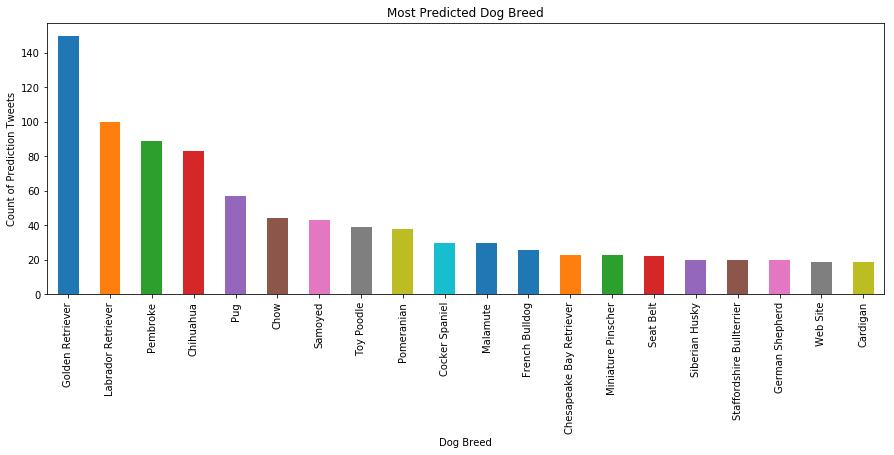

In [344]:
df['prediction_1'].value_counts().nlargest(20).plot(kind = "bar", figsize = (15,5))
plt.title('Most Predicted Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Count of Prediction Tweets');


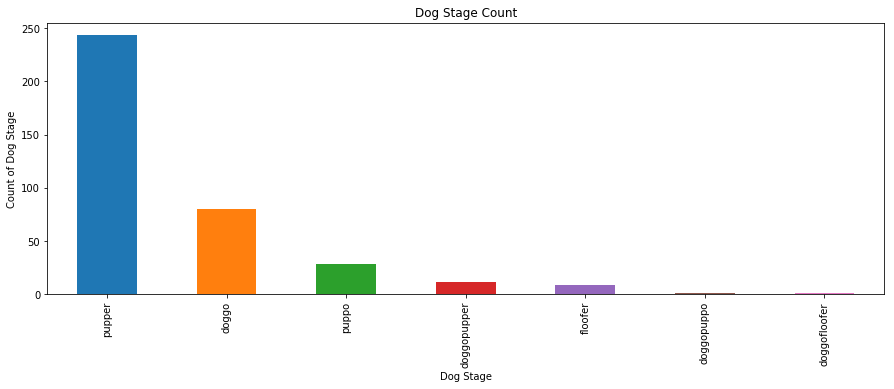

In [345]:
df['dog_stage'].value_counts().plot(kind = "bar", figsize = (15,5));
plt.title('Dog Stage Count')
plt.xlabel('Dog Stage')
plt.ylabel('Count of Dog Stage');

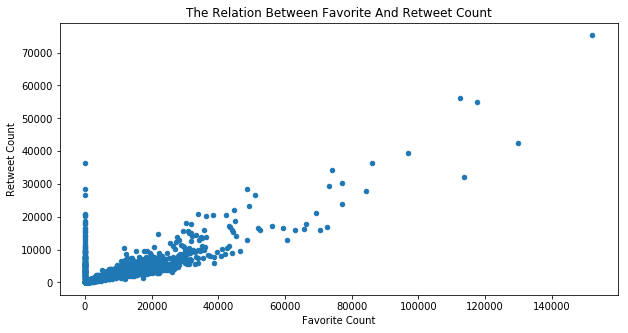

In [346]:
df.plot(x='favorite_count', y='retweet_count', kind='scatter', figsize=(10, 5));
plt.title('The Relation Between Favorite And Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');

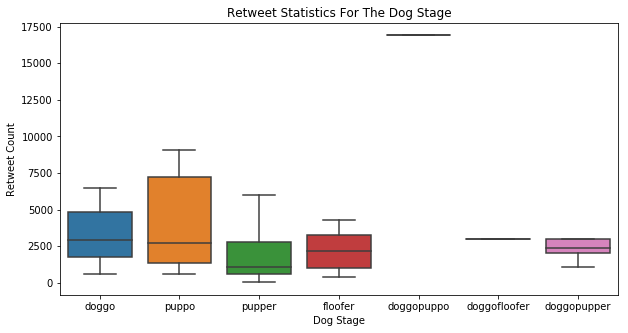

In [347]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(y = 'retweet_count', x = "dog_stage", data=df, showfliers=False)
plt.title('Retweet Statistics For The Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Count');

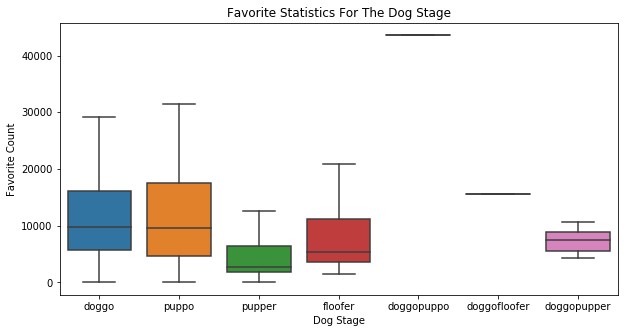

In [348]:
plt.figure(figsize=(10, 5))
sns.boxplot(y = 'favorite_count', x = "dog_stage", data=df, showfliers=False)
plt.title('Favorite Statistics For The Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count');